In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import napari
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\roman\AppData\Local\Temp\ipykernel_8276\3890474644.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Read in and process data

Define what csv files to use

In [3]:
# # cellpose_file = "cellpose_results/cellpose_run04_240427113411.csv"
# # cellpose_file = "cellpose_results/cellpose_run04_240501153104.csv"
# cellpose_file = "cellpose_results/cellpose_run05_240527232502.csv"
cellpose_file = "cellpose_results/cellpose_run06_240529090752.csv"
# # food_file = "FoodSeg103_results/food_run04_240428133857.csv"
# # food_file = "FoodSeg103_results/food_run04_240501155333.csv"
food_file = "FoodSeg103_results/food_run05_240527225603.csv"

Load raw dataframes and process them

In [ ]:
# # # Load the dataframes from the csv files
# cellpose_df = pd.read_csv(cellpose_file)
# # food_df = pd.read_csv(food_file)

# # # For each metric, add a column for the improvement over the ilastik prediction
# for df in [cellpose_df]:#, food_df]:
#     for metric in ['accuracy', 'mIoU', 'mPrecision', 'mRecall', 'mF1']:
#         for scr in df['scribbles'].unique():
#             perf_il = df.loc[(df['scribbles'] == scr) & (df['prediction tag'] == "ilastik"), metric].values[0]
#             df.loc[(df['scribbles'] == scr), f'{metric}_impr_to_ilastik'] = df.loc[(df['scribbles'] == scr), metric] - perf_il

# # # Show the dataframes
# for df in [cellpose_df]:#, food_df]:
    
#     # Show shape, the first rows and the mean values for each scribbles bin
#     print(df.shape)
#     # display(df[:15])
#     display(df.groupby('scribbles bin').agg({'perc. labelled': 'mean', 'pix_labelled': 'mean', 'accuracy': 'mean'}))

Save processed dataframes to csv files

In [4]:
# cellpose_df.to_csv(f'{cellpose_file[:-4]}_processed.csv', index=False)
# food_df.to_csv(f'{food_file[:-4]}_processed.csv', index=False)

Load already processed dataframes from the csv files

In [4]:
cellpose_df = pd.read_csv(f'{cellpose_file[:-4]}_processed.csv')
food_df = pd.read_csv(f'{food_file[:-4]}_processed.csv')
# cellpose_df = cellpose_df.rename(columns={"prediction type": "prediction tag"})
# food_df = food_df.rename(columns={"prediction type": "prediction tag"})

for df in [cellpose_df, food_df]:
    # Show shape, the first rows and the mean values for each scribbles bin
    print(df.shape)
    # display(df[:15])
    display(df.groupby('scribbles bin').agg({'perc. labelled': 'mean', 'pix_labelled': 'mean', 'accuracy': 'mean'}))

(75600, 33)


,perc. labelled,pix_labelled,accuracy
scribbles bin,,,
0.010,0.007990,14.737037,0.745276
0.025,0.020697,38.285185,0.779821
0.050,0.043617,80.861111,0.827624
0.100,0.091388,169.290741,0.850012
0.250,0.238859,440.588889,0.873301
0.500,0.485618,894.625926,0.885425
1.000,0.979729,1802.866667,0.894272
2.500,2.449240,4505.262963,0.904154
5.000,4.841458,8897.888889,0.911711


(71820, 27)


,perc. labelled,pix_labelled,accuracy
scribbles bin,,,
0.010,0.008689,15.538012,0.505804
0.025,0.022316,39.695906,0.534984
0.050,0.044694,79.138402,0.557430
0.100,0.090494,161.169591,0.593346
0.250,0.227889,404.194932,0.658682
0.500,0.449842,796.068226,0.711578
1.000,0.898748,1596.319688,0.773550
2.500,2.306811,4101.473684,0.844736
5.000,4.633914,8209.146199,0.883196


# Choose performance METRIC and DATASET

In [71]:
metric = "accuracy"
# metric = "mPrecision"
# metric = "mRecall"
# metric = "mIoU"
# metric = "mF1"

In [72]:
use_for_all = "cellpose"
# use_for_all = "food"

# Inspect the dataset

### Check for extreme cases by sorting

Examples: best cases for certain model, or worst performance compared to Ilastik

In [73]:
# Define which dataframe to use
# df = cellpose_df.copy()
# df = food_df.copy()
df = {"cellpose": cellpose_df.copy(), "food": food_df.copy()}[use_for_all]

# Optionally filter the dataframe
df_filtered = df[df['prediction tag'] == 'convpaint_l-0_s-1-2']
# df_filtered = df_filtered[df_filtered['layers'] == 0]
# df_filtered = df_filtered[df_filtered['scalings'] == 1]
# df_filtered = df_filtered[(df['scribbles bin'] == 1)]

# List the 10 cases where convpaint performs the worst compared to ilastik
df_filtered.sort_values(by=f'{metric}_impr_to_ilastik', ascending=True)[0:10][['img_num', 'accuracy', 'accuracy_impr_to_ilastik', 'scribbles bin', 'perc. labelled', 'pix_in_img', 'min_class_pix_gt']]

,img_num,accuracy,accuracy_impr_to_ilastik,scribbles bin,perc. labelled,pix_in_img,min_class_pix_gt
13161,94,0.308756,-0.496063,0.010,0.007500,160000,77693
14001,100,0.358479,-0.475980,0.010,0.008889,202500,81266
28015,200,0.441341,-0.423885,0.025,0.021362,262144,37187
45935,328,0.273126,-0.361676,0.025,0.018406,195584,56212
53915,385,0.626669,-0.340208,0.025,0.021943,414720,15976
3921,28,0.622297,-0.306432,0.010,0.008669,196096,36220
57541,411,0.521810,-0.284276,0.010,0.007038,113664,23228
15289,109,0.473541,-0.267721,0.050,0.042725,196608,47509
51115,365,0.569454,-0.266849,0.025,0.023759,50508,23805
30535,218,0.493612,-0.263229,0.025,0.021871,196608,57352


### Check distribution of performance among the dataset

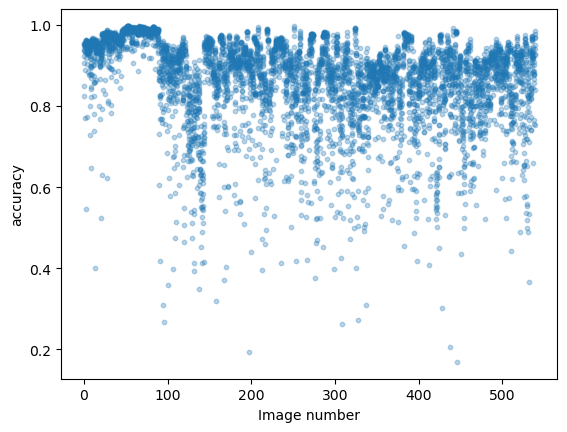

In [74]:
# Define which dataframe to use
# df = cellpose_df.copy()
# df = food_df.copy()
df = {"cellpose": cellpose_df.copy(), "food": food_df.copy()}[use_for_all]

# Optionally filter the dataframe
df_filtered = df[df['prediction tag'] == 'convpaint_l-0_s-1-2']
# df_filtered = df_filtered[(df['scribbles bin'] == 1)]

# Plot
plt.scatter(df_filtered['img_num'], df_filtered[metric], alpha=0.3, s=10)
plt.xlabel('Image number')
plt.ylabel(metric)
plt.show()

# Check distribution of the _improvements over Ilastik_ among the dataset

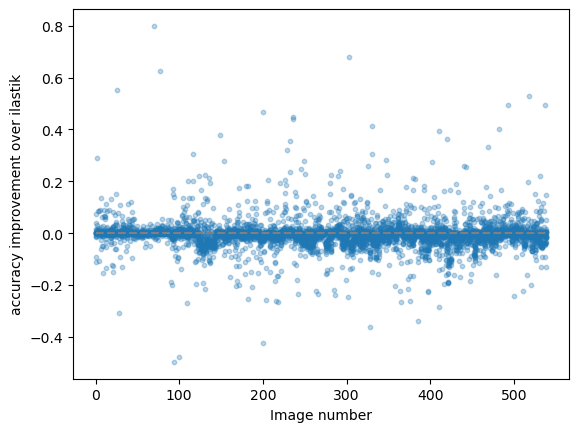

In [75]:
# Define which dataframe to use
# df = cellpose_df.copy()
# df = food_df.copy()
df = {"cellpose": cellpose_df.copy(), "food": food_df.copy()}[use_for_all]

# Optionally filter the dataframe
df_filtered = df[df['prediction tag'] == 'convpaint_l-0_s-1-2']
# df_filtered = df_filtered[(df['scribbles bin'] == 1)]

# Plot
plt.scatter(x = df_filtered['img_num'], y = df_filtered[f'{metric}_impr_to_ilastik'], alpha=0.3, s=10)
plt.xlabel('Image number')
plt.ylabel(f'{metric} improvement over ilastik')
plt.hlines(0, np.min(df_filtered['img_num']), np.max(df_filtered['img_num']), colors='grey', linestyles='dashed')
plt.show()

### Correlation between pixels labelled and improvement

Cellpose: Pixels labelled in one or the other class (not working for FoodSeg103 with multiple classes)

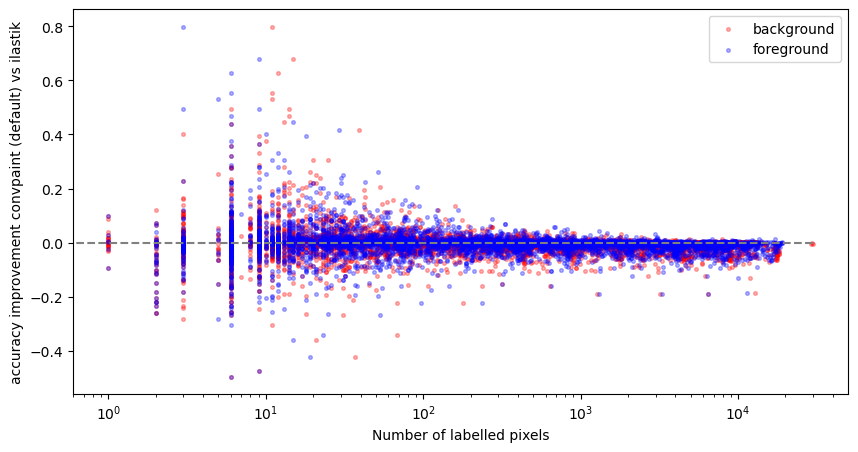

In [76]:
# Define which dataframe to use
df = cellpose_df.copy()

# Optionally filter the dataframe
df_filtered = df[df['prediction tag'] == 'convpaint_l-0_s-1-2']
# df_filtered = df_filtered[(df['scribbles bin'] == 1)]

# Plot
plt.figure(figsize=(10, 5), dpi=100)
plt.scatter(df_filtered["class_1_pix_labelled"], df_filtered[f'{metric}_impr_to_ilastik'], alpha=0.3, s=7, c="red", label="background")
plt.scatter(df_filtered["class_2_pix_labelled"], df_filtered[f'{metric}_impr_to_ilastik'], alpha=0.3, s=7, c = "blue", label="foreground")
plt.xlabel("Number of labelled pixels")
plt.xscale("log")
plt.hlines(0, 0, np.max([np.max(df_filtered["class_1_pix_labelled"]), np.max(df_filtered["class_1_pix_labelled"])]), colors='grey', linestyles='dashed')
plt.ylabel(f'{metric} improvement convpaint (default) vs ilastik')
plt.legend()
plt.show()

Minimum/maximum pixels labelled among classes

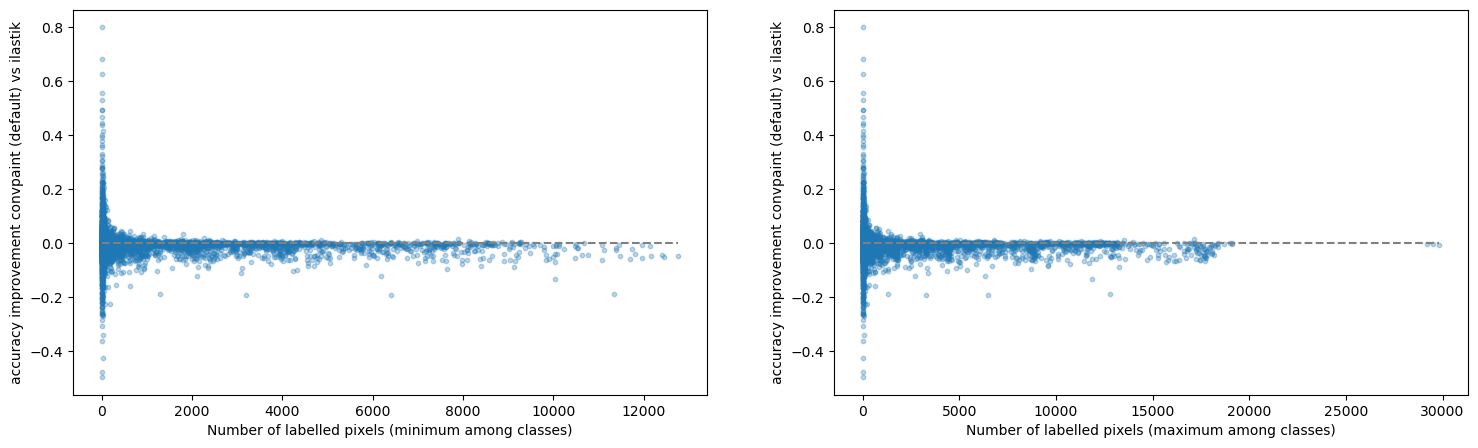

In [77]:
# Define which dataframe to use
# df = cellpose_df.copy()
# df = food_df.copy()
df = {"cellpose": cellpose_df.copy(), "food": food_df.copy()}[use_for_all]

# Optionally filter the dataframe
df_filtered = df[df['prediction tag'] == 'convpaint_l-0_s-1-2']
# df_filtered = df_filtered[(df['scribbles bin'] == 1)]

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5), dpi=100)
ax1.scatter(x = df_filtered['min_class_pix_labelled'], y = df_filtered[f'{metric}_impr_to_ilastik'], alpha=0.3, s=10)
ax1.set_xlabel("Number of labelled pixels (minimum among classes)")
# ax1.set_xscale("log")
ax1.hlines(0, np.min(df_filtered['min_class_pix_labelled']), np.max(df_filtered['min_class_pix_labelled']), colors='grey', linestyles='dashed')
ax1.set_ylabel(f'{metric} improvement convpaint (default) vs ilastik')
ax2.scatter(x = df_filtered['max_class_pix_labelled'], y = df_filtered[f'{metric}_impr_to_ilastik'], alpha=0.3, s=10)
ax2.set_xlabel("Number of labelled pixels (maximum among classes)")
# ax2.set_xscale("log")
ax2.hlines(0, np.min(df_filtered['max_class_pix_labelled']), np.max(df_filtered['max_class_pix_labelled']), colors='grey', linestyles='dashed')
ax2.set_ylabel(f'{metric} improvement convpaint (default) vs ilastik')
plt.show()

### Correlation between the resolution (# pixels) and the improvement

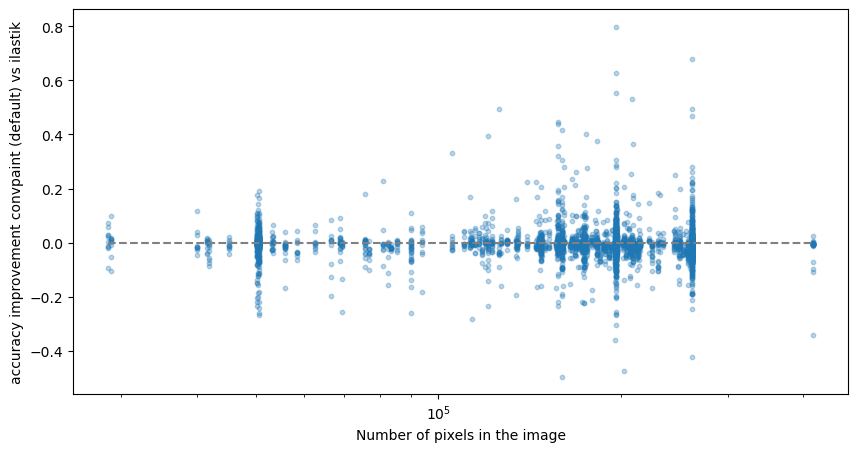

In [78]:
# Define which dataframe to use
# df = cellpose_df.copy()
# df = food_df.copy()
df = {"cellpose": cellpose_df.copy(), "food": food_df.copy()}[use_for_all]

# Optionally filter the dataframe
df_filtered = df[df['prediction tag'] == 'convpaint_l-0_s-1-2']
# df_filtered = df_filtered[(df['scribbles bin'] == 1)]

# Plot
plt.figure(figsize=(10, 5), dpi=100)
plt.scatter(df_filtered["pix_in_img"], df_filtered[f'{metric}_impr_to_ilastik'], alpha=0.3, s=10)
plt.xlabel("Number of pixels in the image")
plt.ylabel(f'{metric} improvement convpaint (default) vs ilastik')
plt.hlines(0, np.min(df_filtered["pix_in_img"]), np.max(df_filtered["pix_in_img"]), colors='grey', linestyles='dashed')
plt.xscale("log")
plt.show()

# Compare bins

### Improvement over Ilastik

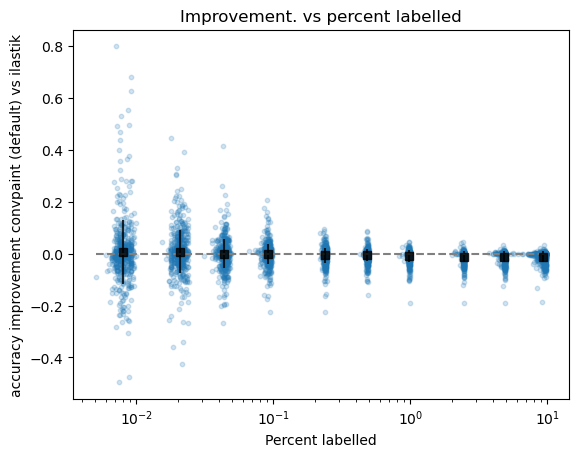

In [79]:
# Define which dataframe to use
# df = cellpose_df.copy()
# df = food_df.copy()
df = {"cellpose": cellpose_df.copy(), "food": food_df.copy()}[use_for_all]

# Optionally filter the dataframe
df_filtered = df[df['prediction tag'] == 'convpaint_l-0_s-1-2']
# df_filtered = df_filtered[(df_filtered['scribbles bin'] > 0.01) & (df_filtered['scribbles bin'] < 10)]
# bins_to_use = [0.1, 1, 10]
# df = df[df['scribbles bin'].isin(bins_to_use)]

# Plot
plt.scatter(df_filtered['perc. labelled'], df_filtered[f'{metric}_impr_to_ilastik'], alpha=0.2, s=10)
df_grouped = df_filtered.groupby('scribbles bin').agg({f'{metric}_impr_to_ilastik': ['mean', 'std'], 'perc. labelled': 'mean'}).reset_index()
plt.errorbar(df_grouped['perc. labelled']['mean'], df_grouped[f'{metric}_impr_to_ilastik']['mean'], yerr=df_grouped[f'{metric}_impr_to_ilastik']['std'], fmt='s', c='black', alpha=0.8)
plt.xscale('log')
plt.xlabel('Percent labelled')
plt.ylabel(f'{metric} improvement convpaint (default) vs ilastik')
plt.hlines(0, np.min(df_filtered['perc. labelled']), np.max(df_filtered['perc. labelled']), colors='grey', linestyles='dashed')
plt.title('Improvement. vs percent labelled')
plt.show()

### Performance of different models on separate dotplots side-by-side

In [80]:
def plot_perf_vs_perc_labelled(df, pred_to_show="convpaint", plt_ax=None, **kwargs):
    if plt_ax is None:
        plt_ax = plt.subplots(1, 1)[1]
    
    if pred_to_show:
        df_exact = df[df['prediction tag'] == pred_to_show]
        if len(df_exact) == 0:
            df_filtered = df[df['prediction tag'].str.contains(pred_to_show)]
        else:
            df_filtered = df_exact

    # Scatterplot
    plt_ax.scatter(df_filtered['perc. labelled'], df_filtered[metric], alpha=0.2, s=10, **kwargs)

    # Grouped plot
    df_grouped = df_filtered.groupby('scribbles bin').agg({metric: ['mean', 'std'], 'perc. labelled': 'mean'}).reset_index()
    plt_ax.errorbar(df_grouped['perc. labelled']['mean'], df_grouped[metric]['mean'], yerr=df_grouped[metric]['std'], fmt='s', c='black', alpha=0.8)
    plt_ax.set_xscale('log')
    plt_ax.set_ylim(0, 1)
    # plt_ax.set_xticks([0.05, 0.1, 1])
    plt_ax.set_xlabel('Percent labelled')
    plt_ax.set_ylabel(metric)
    plt_ax.set_title(f'{metric} vs percent labelled {pred_to_show}')

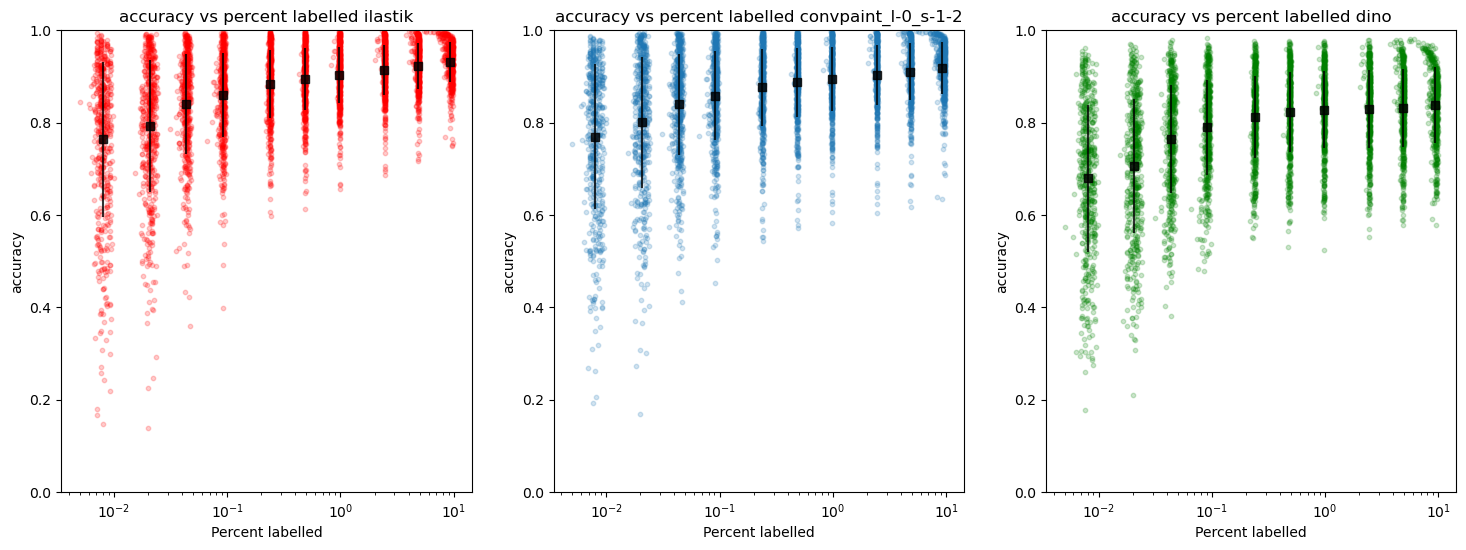

In [81]:
# Define which dataframe to use
# df = cellpose_df.copy()
# df = food_df.copy()
df = {"cellpose": cellpose_df.copy(), "food": food_df.copy()}[use_for_all]

# Optionally filter the dataframe
df_filtered = df[df['prediction tag'] == 'convpaint_l-0_s-1-2']
# df_filtered = df_filtered[(df_filtered['scribbles bin'] > 0.01) & (df_filtered['scribbles bin'] < 10)]
# bins_to_use = [0.1, 1, 10]
# df = df[df['scribbles bin'].isin(bins_to_use)]

# Define the predictions to show
pred_tag_1 = 'ilastik'
pred_tag_2 = 'convpaint_l-0_s-1-2'
pred_tag_3 = 'dino'

# Plot
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(18, 6)
fig.set_dpi(100)
plot_perf_vs_perc_labelled(df, pred_tag_1, plt_ax=ax[0], c='red')
plot_perf_vs_perc_labelled(df, pred_tag_2, plt_ax=ax[1])
plot_perf_vs_perc_labelled(df, pred_tag_3, plt_ax=ax[2], c='green')
# plt.savefig(f'results/{metric}_vs_perc_labelled.pdf', dpi=300)
plt.show()

### Performance of different models on same dotplot

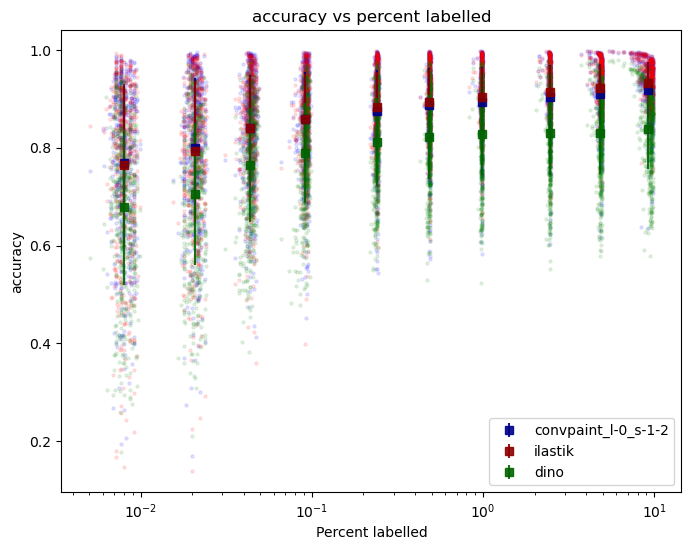

In [82]:
# Define which dataframe to use
# df = cellpose_df.copy()
# df = food_df.copy()
df = {"cellpose": cellpose_df.copy(), "food": food_df.copy()}[use_for_all]

# Optionally filter the dataframe
df_filtered = df[df['prediction tag'] == 'convpaint_l-0_s-1-2']
# df_filtered = df_filtered[(df_filtered['scribbles bin'] > 0.01) & (df_filtered['scribbles bin'] < 10)]
# bins_to_use = [0.1, 1, 10]
# df = df[df['scribbles bin'].isin(bins_to_use)]

# # Define the predictions to show and created filtered dataframes
pred_tag_1 = 'convpaint_l-0_s-1-2'
pred_tag_2 = 'ilastik'
pred_tag_3 = 'dino'
df_filtered_1 = df[df['prediction tag'] == pred_tag_1]
df_filtered_2 = df[df['prediction tag'] == pred_tag_2]
df_filtered_3 = df[df['prediction tag'] == pred_tag_3]

# Plot performance vs percent labelled
plt.figure(figsize=(8,6),dpi=100)

# ADD FIRST PLOT
# Scatterplot
plt.scatter(df_filtered_1['perc. labelled'], df_filtered_1[metric], alpha=0.1, s=5, c='blue')
# Grouped plot
df_grouped = df_filtered_1.groupby('scribbles bin').agg({metric: ['mean', 'std', 'median'], 'perc. labelled': 'mean'}).reset_index()
plt.errorbar(df_grouped['perc. labelled']['mean'], df_grouped[metric]['mean'], yerr=df_grouped[metric]['std'], fmt='s', c='darkblue', alpha=0.9, label=pred_tag_1)
# plt.errorbar(df_grouped['perc. labelled']['mean'], df_grouped[metric]['median'], yerr=0, fmt='s', c='blue', alpha=0.9)

# ADD SECOND PLOT
# Scatterplot
plt.scatter(df_filtered_2['perc. labelled'], df_filtered_2[metric], alpha=0.1, s=5, c='red')
# Grouped plot
df_grouped = df_filtered_2.groupby('scribbles bin').agg({metric: ['mean', 'std', 'median'], 'perc. labelled': 'mean'}).reset_index()
plt.errorbar(df_grouped['perc. labelled']['mean'], df_grouped[metric]['mean'], yerr=df_grouped[metric]['std'], fmt='s', c='darkred', alpha=0.9, label=pred_tag_2)
# plt.errorbar(df_grouped['perc. labelled']['mean'], df_grouped[metric]['median'], yerr=0, fmt='s', c='red', alpha=0.9)

# ADD THIRD PLOT
# Scatterplot
plt.scatter(df_filtered_3['perc. labelled'], df_filtered_3[metric], alpha=0.1, s=5, c='green')
# Grouped plot
df_grouped = df_filtered_3.groupby('scribbles bin').agg({metric: ['mean', 'std', 'median'], 'perc. labelled': 'mean'}).reset_index()
plt.errorbar(df_grouped['perc. labelled']['mean'], df_grouped[metric]['mean'], yerr=df_grouped[metric]['std'], fmt='s', c='darkgreen', alpha=0.9, label=pred_tag_3)
# plt.errorbar(df_grouped['perc. labelled']['mean'], df_grouped[metric]['median'], yerr=0, fmt='s', c='red', alpha=0.9)

# ADJUST PARAMETERS
plt.xscale('log')
plt.xlabel('Percent labelled')
plt.ylabel(metric)
plt.title(f'{metric} vs percent labelled')
plt.legend()
plt.show()

### VIOLINPLOT (performance vs. percent labelled)

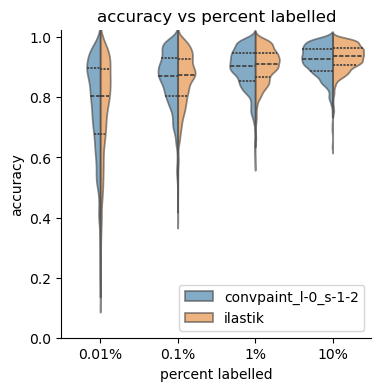

In [83]:
# Define which dataframe to use
# df = cellpose_df.copy()
# df = food_df.copy()
df = {"cellpose": cellpose_df.copy(), "food": food_df.copy()}[use_for_all]

# Optionally filter the dataframe
# df = df[(df['scribbles bin'] > 1)] #& (df['scribbles bin'] < 10)]
bins_to_use = [0.01, 0.1, 1, 10]
df = df[df['scribbles bin'].isin(bins_to_use)]

# Filter for the predicitons to use
pred_tag_1 = 'convpaint_l-0_s-1-2'
pred_tag_2 = 'ilastik'
df_filtered_1 = df[df['prediction tag'] == pred_tag_1]
df_filtered_2 = df[df['prediction tag'] == pred_tag_2]
df_both = pd.concat([df_filtered_1, df_filtered_2])

# Plot performance vs percent labelled (violin plot)
plt.figure(figsize=(4, 4), dpi=100)

# Create the violin plot
ax = sns.violinplot(x='scribbles bin', y=metric, data=df_both, hue='prediction tag', split=True, alpha=0.6, inner="quart", bw_adjust=0.65)

# Create line plot
# Group the bins
df_filtered_1_grouped = df_filtered_1.groupby('scribbles bin').agg({metric: 'median'}).reset_index()
df_filtered_2_grouped = df_filtered_2.groupby('scribbles bin').agg({metric: 'median'}).reset_index()
# Plot the means of each bin and connect them with a line
x_positions = ax.get_xticks()
# plt.plot(x_positions, df_filtered_1_grouped[metric], color='lightblue', alpha=0.8)
# plt.plot(x_positions, df_filtered_2_grouped[metric], color='orange', alpha=0.7)
# original colours: lightblue, orange

# Set some parameters
x_labels = [f"{int(x) if int(x)==x else x}%" for x in df_filtered_1_grouped['scribbles bin']]

plt.ylim(0, 1.025)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(x_positions, x_labels)
plt.legend(loc='lower right')
plt.xlabel('percent labelled')
plt.ylabel(metric)
plt.title(f'{metric} vs percent labelled')

# Show or save the plot
# plt.savefig("cellpose_results/cellpose_run06_convpaint-vs-ilastik_acc-vs-lab.pdf", format='pdf', dpi=300)
# plt.savefig("FoodSeg103_results/food_run06_convpaint-vs-ilastik_acc-vs-lab.pdf", format='pdf', dpi=300)
plt.show()


# Compare VGG16 layer/scaling combos

In [84]:
# Define which dataframe to use
# df = cellpose_df.copy()
# df = food_df.copy()
df = {"cellpose": cellpose_df.copy(), "food": food_df.copy()}[use_for_all]

# Optionally filter before comparing prediciton types (not for models, but e.g. for scribbles bins)
# df = df[(df['scribbles bin'] > 0.01) & (df['scribbles bin'] < 10)]
bins_to_use = [0.1, 1, 10]
df = df[df['scribbles bin'].isin(bins_to_use)]

# Split df for different bins
annot_bins = df['scribbles bin'].unique()
annot_bins = [int(bin) if int(bin) == bin else bin for bin in annot_bins]
bin_df_list = [df[df['scribbles bin'] == bin] for bin in annot_bins]

# For each model, create a list with dfs for each bin
bin_df_list_conv = [single_bin_df[single_bin_df['prediction tag'].str.contains('convpaint')] for single_bin_df in bin_df_list]
bin_df_list_ilastik = [single_bin_df[single_bin_df['prediction tag'].str.contains('ilastik')] for single_bin_df in bin_df_list]
bin_df_list_dino = [single_bin_df[single_bin_df['prediction tag'].str.contains('dino')] for single_bin_df in bin_df_list]

In [85]:
# Check if the lists are composed as intended
# bin_df_list_conv[-1][bin_df_list_conv[-1]['img_num'] == 0]
# bin_df_list_ilastik[0][bin_df_list_ilastik[0]['img_num'] < 2]
# bin_df_list_dino[0][bin_df_list_dino[0]['img_num'] < 2]

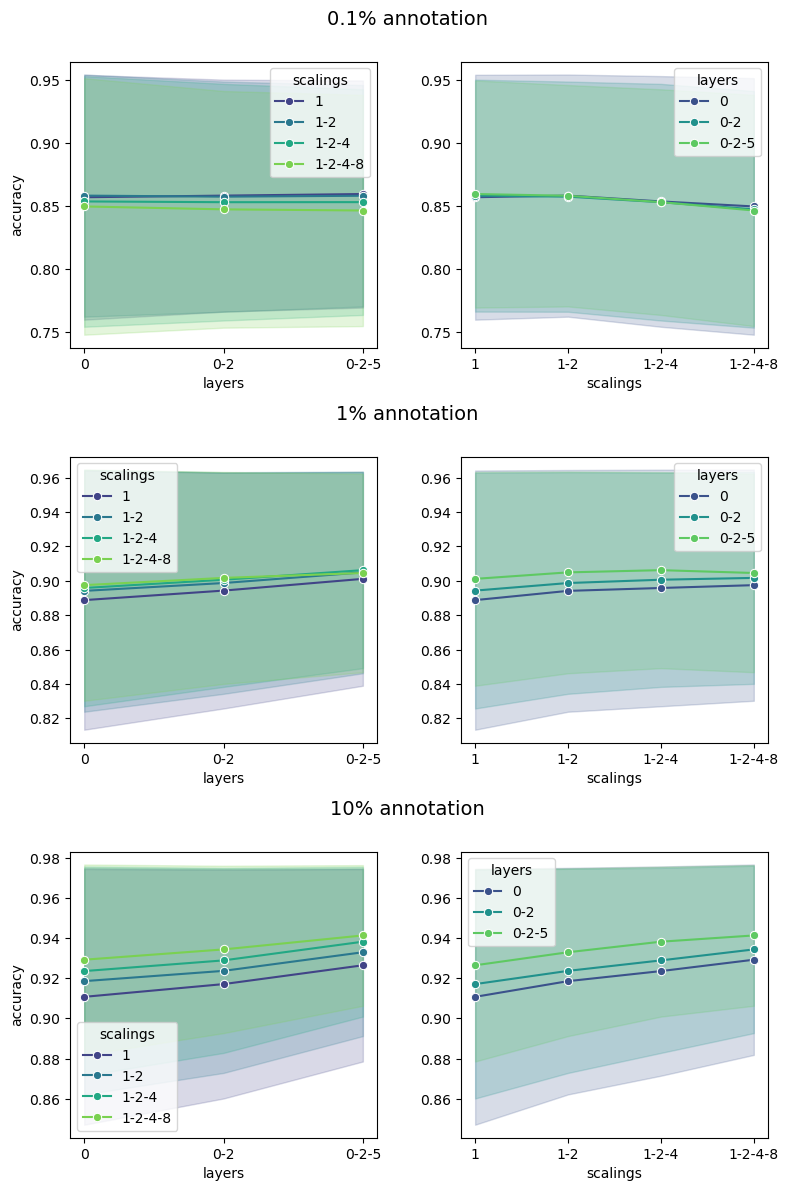

In [86]:
num_df = len(bin_df_list_conv)
fig, ax = plt.subplots(num_df, 2)
# ax = np.array([ax]) # If we have only 1 df, we need to convert the ax to a 2D array

fig.set_size_inches(8, 4 * num_df)
fig.set_dpi(100)

for i, df in enumerate(bin_df_list_conv):
    row = ax[i]
    sns.lineplot(x='layers', y=metric, data=df, hue='scalings', palette='viridis', errorbar='sd', marker='o',ax=row[0])
    sns.lineplot(x='scalings', y=metric, data=df, hue='layers', palette='viridis', errorbar='sd', marker='o',ax=row[1])
    # Hide y axis label of right plot
    row[0].set_title(f"{annot_bins[i]}% annotation", x=1.1, y=1.1, fontsize=14)
    row[1].set_ylabel('')
    # if i != num_df-1:
    #     row[0].set_xlabel('')
    #     row[1].set_xlabel('')
fig.tight_layout()
plt.show()

### Correlation between image resolution and effect of VGG16 scalings

In [87]:
scalings_to_comp = ['1-2-4-8', '1']
grouped_dfs = []
for df_conv_bin in bin_df_list_conv:
    # df_conv_bin = df_conv_bin[df_conv_bin['layers']=='0']
    # Group by 'img_num' and 'scalings' to compute average performance metric
    grouped_df = df_conv_bin.groupby(['img_num', 'scalings'])[metric].mean().unstack()
    grouped_df['img_num'] = grouped_df.index
    grouped_df['pix_in_img'] = df_conv_bin.groupby('img_num')['pix_in_img'].first().values
    grouped_df[f'{metric}_diff'] = grouped_df[scalings_to_comp[0]] - grouped_df[scalings_to_comp[1]]
    grouped_dfs.append(grouped_df)
# Display the result
grouped_dfs[0][:4]

scalings,1,1-2,1-2-4,1-2-4-8,img_num,pix_in_img,accuracy_diff
img_num,,,,,,,
0,0.906374,0.911805,0.904066,0.910936,0,196096,0.004562
1,0.907756,0.902119,0.886176,0.864709,1,196096,-0.043047
2,0.937158,0.920214,0.908346,0.906615,2,196096,-0.030543
3,0.888893,0.876236,0.872202,0.864673,3,196096,-0.024219


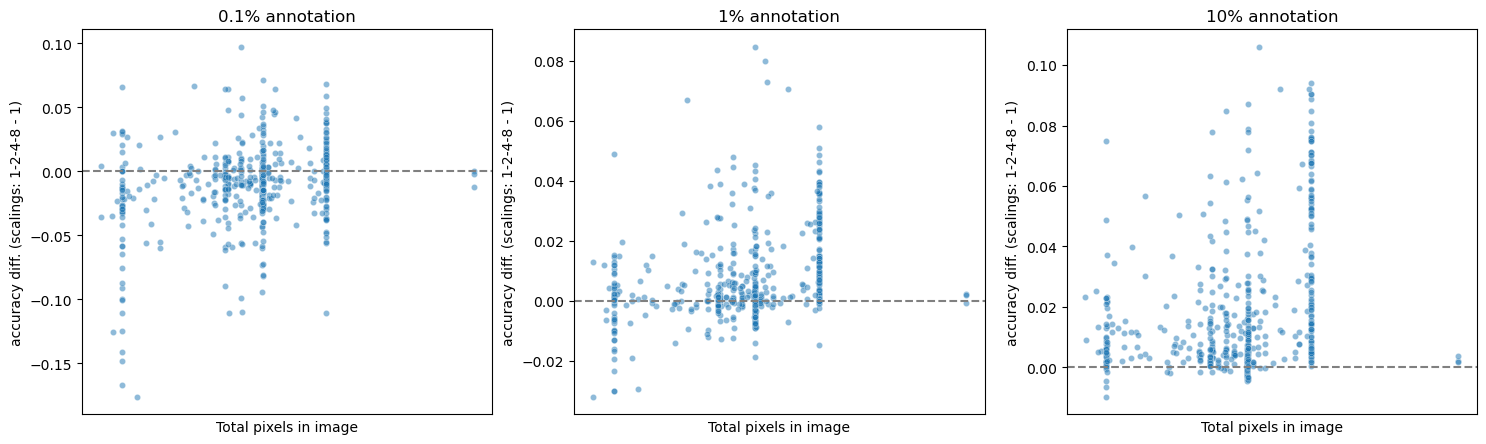

In [88]:
num_cols = int(np.ceil(num_df/2)) if num_df > 3 else num_df
num_rows = 2 if num_df > 3 else 1
fig, ax = plt.subplots(num_rows, num_cols)
ax = np.array([ax]) # If we have only 1 df, we need to convert the ax to a 2D array
ax = ax.flatten()
fig.set_size_inches(6*num_cols, 5*num_rows)
fig.set_dpi(100)
for i, grouped_df in enumerate(grouped_dfs):
    curr_ax = ax[i]
    sns.scatterplot(x='pix_in_img', y=f'{metric}_diff', data=grouped_df, s=20, alpha=0.5, ax=curr_ax)
    # curr_ax.set_xscale('log')
    # curr_ax.set_yscale('log')
    curr_ax.axhline(0, color='grey', linestyle='--')
    curr_ax.set_xticks([])    
    curr_ax.set_xlabel('Total pixels in image')
    curr_ax.set_ylabel(f'{metric} diff. (scalings: {scalings_to_comp[0]} - {scalings_to_comp[1]})')
    curr_ax.set_title(f'{annot_bins[i]}% annotation')
plt.show()

# HEATMAPS for model comparison

### Different ConvPaint models (layers/scaling combinations)

In [89]:
# Define which dataframe to use
# df = cellpose_df.copy()
# df = food_df.copy()
df = {"cellpose": cellpose_df.copy(), "food": food_df.copy()}[use_for_all]

# Take only convpaint predictions
df[df['prediction tag'].str.contains('convpaint')]

# Optionally filter before comparing prediciton types (e.g. for scribbles bins)
# df = df[(df['scribbles bin'] > 0.01) & (df['scribbles bin'] < 10)]
bins_to_use = [0.1, 1, 10]
df = df[df['scribbles bin'].isin(bins_to_use)]

# Split df for different bins
annot_bins = df['scribbles bin'].unique()
annot_bins = [int(bin) if int(bin) == bin else bin for bin in annot_bins]
bin_df_list = [df[df['scribbles bin'] == bin] for bin in annot_bins]
bin_df_list_conv = bin_df_list

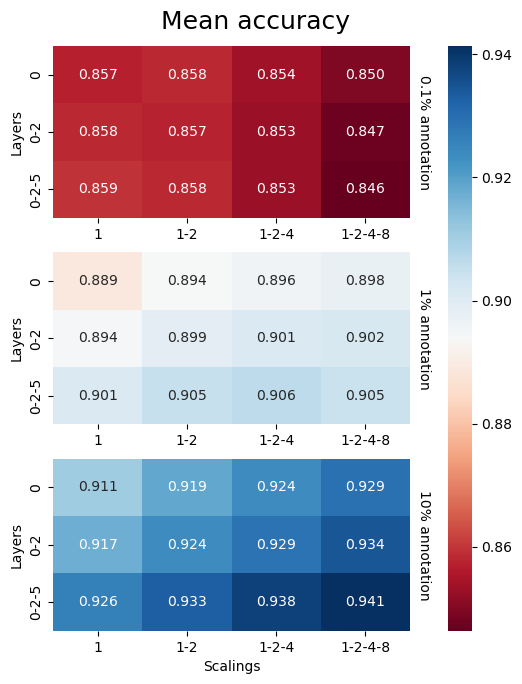

In [90]:
num_bins = len(annot_bins)
min_val = min([bin_df.pivot_table(index='layers', columns='scalings', values=metric).min().min() for bin_df in bin_df_list_conv])
max_val = max([bin_df.pivot_table(index='layers', columns='scalings', values=metric).max().max() for bin_df in bin_df_list_conv])
axis_matrix = [[str(bin), 'cbar'] for bin in annot_bins]
fig, ax = plt.subplot_mosaic(axis_matrix, gridspec_kw={'width_ratios': [15, 1]})
ax_list = [ax[str(bin)] for bin in annot_bins]

unit, dpi = 18, 100
ratio = unit / dpi
title_height = 4 * ratio
plot_height = title_height + (1 + 12 * num_bins) * ratio # title + bottom + plot per bin
plot_width = 18 * (30) / 100
fig.set_size_inches(plot_width, plot_height)
fig.set_dpi(100)
fig.suptitle(f'Mean {metric}', fontsize=18, y =  1 - 1/2*(title_height / plot_height))
fig.subplots_adjust(top = 1 - (title_height / plot_height))
# fig.tight_layout(rect=[0, 0, 1, 0.99])

for i, df in enumerate(bin_df_list_conv):
    row = ax_list[i]
    # Create a pivot table for heatmap
    heatmap_df_mean = df.pivot_table(index='layers', columns='scalings', values=metric)
    sns.heatmap(heatmap_df_mean, annot=True, cmap="RdBu", fmt=".3f", cbar=i==0, cbar_ax=ax['cbar'], ax=row, vmin=min_val, vmax=max_val)
    row.text(1.02, 0.5, f'{annot_bins[i]}% annotation', transform=row.transAxes, rotation=270, va='center')
    row.set_xlabel('Scalings' if i == num_bins - 1 else '')
    row.set_ylabel('Layers')

    # row.set_aspect('auto')

# plt.savefig(f'FoodSeg103_results/avg_{metric}_convpaint.pdf', dpi=300)
plt.show()

### Convpaint models vs. Ilastik and DINOv2

In [91]:
# Define which dataframe to use
# df = cellpose_df.copy()
# df = food_df.copy()
df = {"cellpose": cellpose_df.copy(), "food": food_df.copy()}[use_for_all]

# Optionally filter the dataframe
# df = df[(df['scribbles bin'] > 0.01) & (df['scribbles bin'] < 10)]
bins_to_use = [0.01, 0.1, 1, 10]
df = df[df['scribbles bin'].isin(bins_to_use)]

# Split df for different bins
annot_bins = df['scribbles bin'].unique()
annot_bins = [int(bin) if int(bin) == bin else bin for bin in annot_bins]
bin_df_list = [df[df['scribbles bin'] == bin] for bin in annot_bins]

# For each model, create a list with dfs for each bin
bin_df_list_conv = [single_bin_df[single_bin_df['prediction tag'].str.contains('convpaint')] for single_bin_df in bin_df_list]
bin_df_list_ilastik = [single_bin_df[single_bin_df['prediction tag'].str.contains('ilastik')] for single_bin_df in bin_df_list]
bin_df_list_dino = [single_bin_df[single_bin_df['prediction tag'].str.contains('dino')] for single_bin_df in bin_df_list]

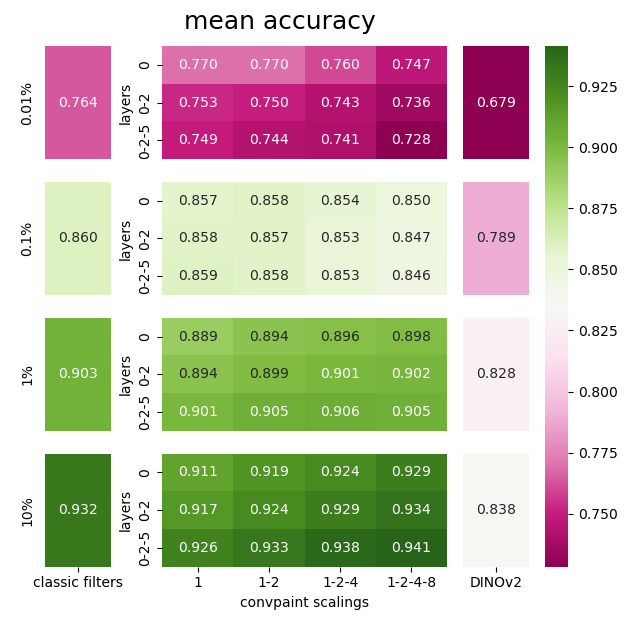

In [92]:
num_bins = len(annot_bins)
min_val = min([bin_df.pivot_table(index='layers', columns='scalings', values=metric).min().min() for bin_df in bin_df_list_conv])
max_val = max([bin_df.pivot_table(index='layers', columns='scalings', values=metric).max().max() for bin_df in bin_df_list_conv])

axis_matrix = np.array([['pad left', 
                          str(bin)+'ilastik', 
                          'pad', 
                          str(bin)+'convpaint', 
                          str(bin)+'dino', 
                          'cbar'] for bin in annot_bins])
fig, ax = plt.subplot_mosaic(axis_matrix, gridspec_kw={'width_ratios': [1, 3.5, 1, 15, 3.5, 1.2]})
for pad in ['pad left', 'pad']: ax[pad].axis('off')

unit, dpi = 18, 100
ratio = unit / dpi
title_height = 4 * ratio
plot_height = title_height + (1 + 8 * num_bins) * ratio # title + bottom + plot per bin
plot_width = unit * (40) / 100
fig.set_size_inches(plot_width, plot_height)
fig.set_dpi(100)
fig.suptitle(f'mean {metric}', fontsize=unit, y =  1 - 1/2*(title_height / plot_height))
fig.subplots_adjust(top = 1 - (title_height / plot_height))
# fig.tight_layout(rect=[0, 0, 1, 0.99])

heatmap_cfg = {"annot":True, "cmap":"PiYG", "fmt":".3f", "cbar_ax":ax['cbar'], "vmin":min_val, "vmax":max_val}
# original cmap = 'YlGnBu'; good alternatives: twilight_shifted, RdBu, PuBuGn, PuBu, BuGn, PiYG

# CONVPAINT
ax_list_conv = [ax[ax_idx] for ax_idx in axis_matrix[:,3]]#[ax['upper left'], ax['mid left'], ax['lower left']]
for i, df in enumerate(bin_df_list_conv):
    row = ax_list_conv[i]
    # Create a pivot table for heatmap
    heatmap_df_mean = df.pivot_table(index='layers', columns='scalings', values=metric)
    sns.heatmap(heatmap_df_mean, cbar=i==0, ax=row, **heatmap_cfg)

    row.set_xlabel('convpaint scalings' if i == num_bins - 1 else '')
    if not i == num_bins - 1: row.set_xticks([])
    row.set_ylabel('layers')

# ILASTIK
ax_list_ila = [ax[ax_idx] for ax_idx in axis_matrix[:,1]] #[ax['upper mid'], ax['mid mid'], ax['lower mid']]
for i, df in enumerate(bin_df_list_ilastik):
    row = ax_list_ila[i]
    # Create a pivot table for heatmap, but only use the one value given for Ilastik
    heatmap_df_mean = df[metric].mean().reshape((1,1))
    sns.heatmap(heatmap_df_mean, cbar=False, ax=row, **heatmap_cfg)

    if i == num_bins - 1:
        row.set_xticklabels(["classic filters"])
    else:
        row.set_xticks([])
    row.set_yticks([])
    row.text(-0.37, 0.5, f'{annot_bins[i]}%', transform=row.transAxes, rotation=90, va='center')

# DINOv2
ax_list_dino = [ax[ax_idx] for ax_idx in axis_matrix[:,4]]
for i, df in enumerate(bin_df_list_dino):
    row = ax_list_dino[i]
    # Create a pivot table for heatmap, but only use the one value given for Ilastik
    heatmap_df_mean = df[metric].mean().reshape((1,1))
    sns.heatmap(heatmap_df_mean, cbar=False, ax=row, **heatmap_cfg)

    if i == num_bins - 1:
        row.set_xticklabels(["DINOv2"])
    else:
        row.set_xticks([])
    row.set_yticks([])

# plt.savefig(f'cellpose_results/cellpose_run06_avg_{metric}_heatmap.pdf', dpi=300)
# plt.savefig(f'FoodSeg103_results/food_run06_avg_{metric}_heatmap.pdf', dpi=300)
plt.show()